## Source / Sink in Freestream

In [27]:
import numpy as np
import math
from matplotlib import pyplot
%matplotlib inline

In [28]:
N = 200                               # Number of points in each direction
x_start, x_end = -4.0, 4.0            # x-direction boundaries
y_start, y_end = -2.0, 2.0            # y-direction boundaries
x = np.linspace(x_start, x_end, N)    # 1D-array for x
y = np.linspace(y_start, y_end, N)    # 1D-array for y
X, Y = np.meshgrid(x, y)              # generates a mesh grid

In [11]:
# Other Parameters
u_inf = 1.0
u_free = u_inf * np.ones((N, N), dtype=float)
v_free = np.zeros((N, N), dtype = float)

psi_free = u_inf * Y

In [14]:
# Function to Determine u,v velocity components
def get_uv(strength, xs, ys, X,Y):
    """
    Function to determine the u and v velocity components
    Parameters
    ---------
    strength = strength of source or sink
    xs, ys = x and y location of the source/sink
    X, Y = the mesh grid of the domain
    """
    u = strength / (2*np.pi) * (X-xs)/((X-xs)**2 + (Y-ys)**2)
    v = strength / (2*np.pi) * (Y-ys)/((X-xs)**2 + (Y-ys)**2)
    
    return u, v

In [15]:
help(get_uv)

Help on function get_uv in module __main__:

get_uv(strength, xs, ys, X, Y)
    Function to determine the u and v velocity components
    Parameters
    ---------
    strength = strength of source or sink
    xs, ys = x and y location of the source/sink
    X, Y = the mesh grid of the domain



In [23]:
# Function to Deterine Stream Function
def get_psi(strength, xs, ys, X, Y):
    """
    Returns stream function generated by source/sink
    Parameters
    ---------
    strength = strength of source/sink
    xs, ys = coordinate position of source/sink
    X,Y = meshed points of the domain
    """
    psi = strength / (2*np.pi) * np.arctan2((Y - ys), (X-xs))
    
    return psi

In [69]:
strength_source = 2.0
x_s, y_s = -1., 0. 

u_source, v_source = get_uv(strength_source, x_s, y_s, X, Y)

psi_source = get_psi(strength_source, x_s, y_s, X, Y)

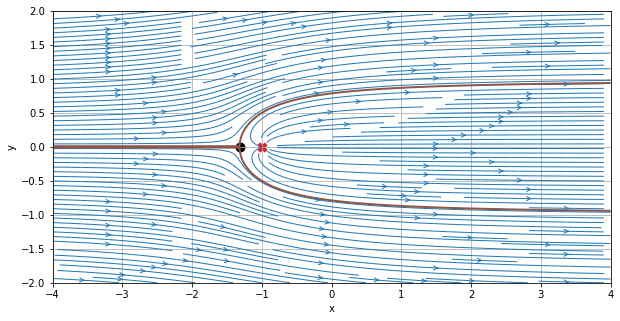

In [70]:
# Superimpose of the Source and Freestream Components
u = u_free + u_source
v = v_free + v_source
psi = psi_free + psi_source

# Plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.grid(True)
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density = 2, linewidth = 1, arrowstyle = '->')
pyplot.scatter(x_s, y_s, color='C3', s=80, marker='X')

# Stagnation Point Calculation
x_stag = x_s - strength_source / (2*np.pi * u_inf)
y_stag = y_s

# Display Stag Point
pyplot.scatter(x_stag, y_stag, color='k', s=80)

# Display Dividing Streamline
pyplot.contour(X, Y, psi, levels=[-strength_source / 2, strength_source/2], 
              colors='C5', linewidths = 2, linestyles = 'solid')

## Source/Sink Pair with Freestream

In [64]:
strength_sink = -5.0
x_sink, y_sink = 1.0, 0.0

u_sink, v_sink = get_uv(strength_sink, x_sink, y_sink, X, Y)

psi_sink = get_psi(strength_sink, x_sink, y_sink, X, Y)

In [65]:
# Superimpose Source, Sink, and Freestream
u = u_sink + u_source + u_free
v = v_sink + v_source + v_free
psi = psi_free + psi_sink + psi_source

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: The following kwargs were not used by contour: 'linestlyes'
  del sys.path[0]


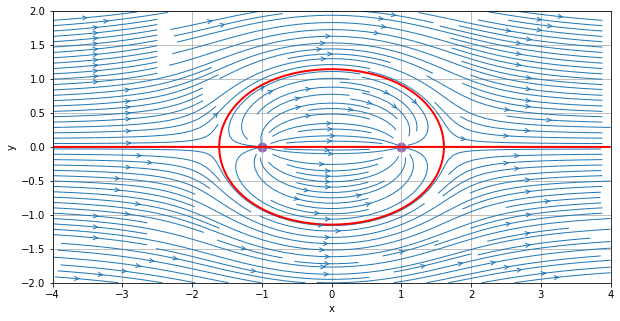

In [66]:
# Plot Streamlines of Combo
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.grid(True)
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density = 1.75, linewidth = 1, arrowsize=1, arrowstyle = '->')
pyplot.scatter([x_s, x_sink], [y_s, y_sink], color = 'C4',
              s = 80, marker='o')
pyplot.contour(X, Y, psi, levels=[0.], colors = 'r', linewidths = 2, linestlyes='solid')

In [87]:
dist = x_stag
length_1 = (strength_source * dist) / np.pi * u_inf + dist*2
np.sqrt(np.abs(length_1))

1.8643717204516481

## Bernoulli's and Pressure Coefficient,  $C_{p}$

In [68]:
# Calculating the Pressure Coefficient Field
cp = 1.0 - (u**2 + v**2) / (u_inf**2)

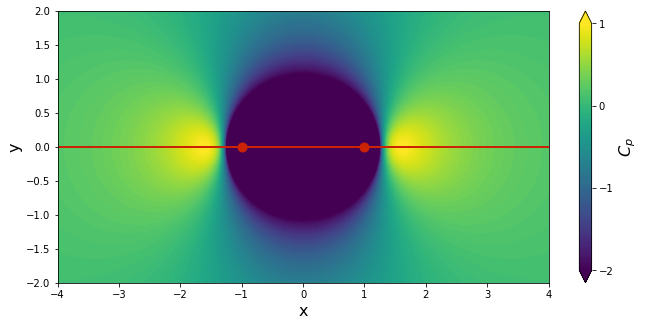

In [90]:
# Plot Pressure Field
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(1.1 * width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp,
                        levels=np.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.scatter([x_s, x_sink], [y_s, y_sink],
               color='#CD2305', s=80, marker='o')
pyplot.contour(X, Y, psi,
               levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');